<a href="https://colab.research.google.com/github/KLeeDE/PUS2020_KLee/blob/master/HW2_PhillyParks_instructions_20200914.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW2 : Summary statistics

this homework performs strictly an exploratory analysis of the data

Consult the https://www.cin.ufpe.br/~embat/Python%20for%20Data%20Analysis.pdf Python for Data Analysis book (pandas book) chapter 7 or this digital rendition of its content here https://github.com/fedhere/PUS2020_FBianco/blob/master/HW2/PandasCh7.ipynb. 

Also use the code examples in the folder classdemo https://github.com/fedhere/PUS2020_FBianco/tree/master/classdemo

**important**
turn in the notebook by uploading it to your github repository in a folder called HW2. Before you uploade the notebook make sure you 
- click above: Runtime -> Restart and run all

this will assure that your notebook has not bugs due to running the cells of code out of order.


In [1]:
# you should only need the packathon pandas
import pandas as pd

## Read in the data about the Philly parks 
you can find the data at 
http://data-phl.opendata.arcgis.com/datasets/d52445160ab14380a673e5849203eb64_0.csv")

In [2]:
pparks = pd.read_csv("https://data-phl.opendata.arcgis.com/datasets/d52445160ab14380a673e5849203eb64_0.csv")

In [3]:
# show the shape of the parks file dataframe
pparks.shape

(522, 25)

In [4]:
# show the column names in the dataframe
pparks.columns

Index(['OBJECTID', 'PUBLIC_NAME', 'PARENT_NAME', 'NESTED', 'OFFICIAL_NAME',
       'LABEL', 'ALIAS', 'DPP_ASSET_ID', 'ADDRESS911', 'ZIPCODE',
       'ADDRESS_BRT', 'ALIAS_ADDRESS', 'ACREAGE', 'PROPERTY_CLASSIFICATION',
       'PPR_USE', 'PPR_DISTRICT', 'PPR_OPS_DISTRICT', 'COUNCIL_DISTRICT',
       'POLICE_DISTRICT', 'CITY_SCALE_MAPS', 'LOCAL_SCALE_MAPS',
       'PROGRAM_SITES', 'COMMENTS', 'Shape__Area', 'Shape__Length'],
      dtype='object')

In [5]:
# show the beginning of the dataframe (the first 5 rows)
pparks.head()

,OBJECTID,PUBLIC_NAME,PARENT_NAME,NESTED,OFFICIAL_NAME,LABEL,ALIAS,DPP_ASSET_ID,ADDRESS911,ZIPCODE,ADDRESS_BRT,ALIAS_ADDRESS,ACREAGE,PROPERTY_CLASSIFICATION,PPR_USE,PPR_DISTRICT,PPR_OPS_DISTRICT,COUNCIL_DISTRICT,POLICE_DISTRICT,CITY_SCALE_MAPS,LOCAL_SCALE_MAPS,PROGRAM_SITES,COMMENTS,Shape__Area,Shape__Length
0,1,William H (Billy) Markward Memorial Playground,Schuylkill River Park,Y,William H. (Billy) Markward Memorial Playground,Markward,NaN,1903,400 S TANEY ST,19146,"400-16 S TANEY ST, 338-46 S 26TH ST, 300 S 26T...",400-16 S TANEY ST;Pine & Taney;338-46 S 26TH S...,3.379158,NEIGHBORHOOD_PARK,RECREATION_SITE,7,"5, 7",2,9,Y,Y,Y,NaN,23295.664062,892.868012
1,2,Schuylkill Banks,Schuylkill Banks,N,NaN,Schuylkill Banks,NaN,2794,400 S TANEY ST,19103,NaN,400-16 S TANEY ST,14.717314,NEIGHBORHOOD_PARK,GREENWAY_PARKWAY,7,"5, 7","2, 5","9, 17",Y,Y,N,Bill 160113 (4/14/16) -South of South St Bridge,101477.179688,9300.670289
2,3,Schuylkill River Park,Schuylkill River Park,N,NaN,Schuylkill River Park,NaN,2992,400 S TANEY ST,19146,"400-16 S TANEY ST, 338-46 S 26TH ST, 300 S 26T...","Pine & Taney;400-16 S TANEY ST, 338-46 S 26TH ...",7.327000,NEIGHBORHOOD_PARK,RECREATION_SITE,7,"5, 7",2,9,Y,Y,N,NaN,50512.582031,1259.304657
3,4,Frankford Boat Launch,Frankford Boat Launch,N,Frankford Boat Launch,Frankford Boat Launch,PA Fish & Boat;Frankford Arsenal Boat Launch,3090,5625 TACONY ST,19137,5625 TACONY ST,5650 Tacony St,19.398075,NEIGHBORHOOD_PARK,BOATHOUSE_LAUNCH,2,2,6,15,Y,Y,N,NaN,133961.171875,1641.529044
4,5,Orthodox Street Park,Orthodox Street Park,N,NaN,Orthodox,Orthodox Street Parcel; Bridesburg Riverfront ...,3091,3101 ORTHODOX ST,19137,3101 ORTHODOX ST,NaN,16.229629,NEIGHBORHOOD_PARK,UNDEVELOPED,5,2,6,15,Y,Y,N,Officially acquired from PAID in 10/2019. Doc ...,112026.734375,1679.085206


In [6]:
# show the end of the dataframe (the last 5 rows)
pparks.tail()

,OBJECTID,PUBLIC_NAME,PARENT_NAME,NESTED,OFFICIAL_NAME,LABEL,ALIAS,DPP_ASSET_ID,ADDRESS911,ZIPCODE,ADDRESS_BRT,ALIAS_ADDRESS,ACREAGE,PROPERTY_CLASSIFICATION,PPR_USE,PPR_DISTRICT,PPR_OPS_DISTRICT,COUNCIL_DISTRICT,POLICE_DISTRICT,CITY_SCALE_MAPS,LOCAL_SCALE_MAPS,PROGRAM_SITES,COMMENTS,Shape__Area,Shape__Length
517,518,Sedgely and Fletcher Warehouse,Sedgely and Fletcher Warehouse,N,NaN,Sedgely Warehouse,Sedgley Storeroom;Maintenance Warehouse,99999,2528 W SEDGLEY AVE,19132,2528-34 W SEDGLEY AVE,W Sedgley Ave & N 26th St;2528-34 W SEDGLEY AVE,0.773902,NEIGHBORHOOD_PARK,OPERATIONS,6,6,5,22,N,Y,N,School District leases to PPR.,5341.640625,356.178092
518,519,Fox Chase - Lorimer Trail Greenway (Rhawn),Fox Chase - Lorimer Trail Greenway (Rhawn),N,NaN,Fox Chase - Lorimer Greenway,NaN,99999,439 RHAWN ST,19111,NaN,Rhawn St and Elberon Ave;8217 BURHOLME AVE,3.589356,NEIGHBORHOOD_PARK,UNDEVELOPED,1,1,10,7,Y,Y,N,No Public Access. Undeveloped Land awaiting Fo...,24840.667969,2152.448099
519,520,Bartrams Mile Trail Greenway,Bartrams Mile Trail Greenway,N,NaN,Bartrams Trail Greenway,Bartram's Mile; Bartrams South,0,NaN,19143,NaN,NaN,9.217030,NEIGHBORHOOD_PARK,GREENWAY_PARKWAY,9,8,3,"12,18",Y,N,N,In Development,63509.933594,2635.375719
520,521,Loretto and Gilham Triangle,Loretto and Gilham Triangle,N,NaN,Loretto and Gilham,Cranford Ave andd Magee Ave Traffic Island; No...,245,1385 GILHAM ST,19111,Registry - 144N070092,6540 LORETTO AVE,0.161596,POCKET_PARK,BREEZEWAY_ISLAND,1,2,9,2,Y,Y,N,NaN,1116.867188,144.694698
521,522,Rail Park,Rail Park,N,The Rail Park,Rail Park,NaN,99999,1250 NOBLE ST,19123,NaN,1136 CALLOWHILL ST,0.872112,NEIGHBORHOOD_PARK,GREENWAY_PARKWAY,10,5,1,6,Y,Y,N,Elevated former railway.,6009.941406,825.079151


## meausre the central tendency of the Philly park sizes
measure the mean and the median and compare them

In [7]:
meanps = pparks.mean()
meanps

OBJECTID            261.500000
DPP_ASSET_ID       3761.093870
ZIPCODE           19021.597701
ACREAGE              23.238296
Shape__Area      160576.663539
Shape__Length      1813.954186
dtype: float64

In [8]:
# show the median size of the dataframe 
# are they the same? 
medianps = pparks.median()
print(medianps)
print("")
print("The mean and the median size of the dataframe are different")

OBJECTID           261.500000
DPP_ASSET_ID      1846.500000
ZIPCODE          19132.000000
ACREAGE              3.593854
Shape__Area      24832.205078
Shape__Length      707.694865
dtype: float64

The mean and the median size of the dataframe are different


**Question**: what can you conclude from 
 the values of the mean and median you extracted? (discuss in a text cell below)


**Answer**: This question is about the mean and median size of the dataframe of the Philly parks. According to the data above, the mean size of the acreage is 23.24 and the medain size of the one is around 3.6. The mean size of the Shape area is around 160,577 and the median size of the one is around 24,832. Because the mean is higher than the median, the distribution of the size (acreage) is "right-skewed" or "positive skewed". 

Mean: 23.238296223045964
Medain: 3.59385373


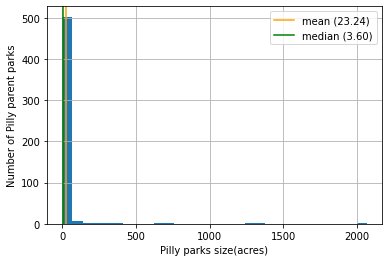

In [9]:
# -- Reframe 
meanps = pparks["ACREAGE"].mean()
medianps = pparks["ACREAGE"].median()
print("Mean: {0}".format(meanps))
print("Medain: {0}".format(medianps))

# -- Plot the histogram
ax = pparks.ACREAGE.hist(bins = 30)
ax.axvline(x=meanps, c="orange", label="mean (23.24)")
ax.axvline(x=medianps, c="green", label="median (3.60)")
ax.set_xlabel("Pilly parks size(acres)")
ax.set_ylabel("Number of Pilly parent parks")
ax.legend();


Figure Caption: Imagine that the reader has no access to my instructions, or to the code. What does this figure show? what should the reader note about the figure? 


**Figure 1**: Hisogram of the central tendency of the Philly park sizes. The unit is ACRES. The yellow line indicates the mean of the size, which is 23.24 acres. The green line indicates the medain of the size, which is 3.6 acres. As the graph shown above, the mean is higher than the mean. Therefore, it is plausible to say that the the distribution of the data of the Philly park sizes is right-skewed. 

## what is the spread of park sizes?
calculate the standard deviation of the park sized

In [10]:
stdps = pparks.std()
print("standard deviation of park size is {0} Acres".format(stdps.ACREAGE.round(2)))

standard deviation of park size is 131.88 Acres


## select only a subset of the parks: the pasks smaller than 10 acres
calculate the mean and median and plot a histogram of the park sized with the mean and median indicated on the plot

Mean of the parks smaller than 10 acres is 2.9079506748410746
Median of the parks smaller than 10 acres is 2.05984969



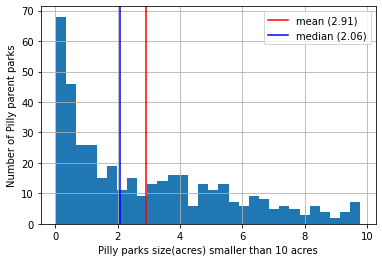

In [11]:
# -- Subset the parks smaller than 10 acres
pparks_10 = pparks[pparks.ACREAGE < 10]

# -- Calculate mean and median
print("Mean of the parks smaller than 10 acres is {0}".format(pparks_10.ACREAGE.mean()))
print("Median of the parks smaller than 10 acres is {0}".format(pparks_10.ACREAGE.median()))
print("")

# -- Reframe 
meanps_10 = pparks_10["ACREAGE"].mean()
medianps_10 = pparks_10["ACREAGE"].median()

# -- Plot the histogram
ax = pparks_10.ACREAGE.hist(bins = 30)
ax.axvline(x=meanps_10, c="red", label="mean (2.91)")
ax.axvline(x=medianps_10, c="blue", label="median (2.06)")
ax.set_xlabel("Pilly parks size(acres) smaller than 10 acres")
ax.set_ylabel("Number of Pilly parent parks")
ax.legend();


Figure Caption: Imagine that the reader has no access to my instructions, or to the code. What does this figure show? what should the reader note about the figure?


**Figure 2**: Hisogram of the central tendency of the Philly park sizes smaller than 10 acres. This graph shows the distribution of the Philly park sizes clearly rather than the graph in Figure 1. The red line indicates the mean of the size, which is 2.91 acres. The blue line indicates the medain of the size, which is 2.06 acres. Similarly, the mean is higher than the mean, and therefore the distribution of the data is right-skewed. The difference between Figure 1 and Figure 2 is that the gap between the mean and the median in the Figure 2 is more apprent the one in Figure 1.   

# Challenge

the parks listed in each row are in some cases subsets of larger parks. The "parent" park is listed under PARENT_NAME. 

The challenge is to visualize the distribution of sizes of the  parent parks. To do that you have to aggregate the parks based on the "PARENT_NAME" value and sum the size of the parks. The methods of the dataframe you want to use are 
```.groupby()```
and 
```.sum()```

                                   OBJECTID  ...  Shape__Length
PARENT_NAME                                  ...               
10th and Lemon Playground                40  ...     169.462813
11th and Cecil B Moore Playground       183  ...     755.891229
12th and Cambria Playground             263  ...     542.995987
17th and Carpenter Play Lot             514  ...     184.887743
18th and Jackson War Memorial           390  ...     148.363162
...                                     ...  ...            ...
Womrath Park                            265  ...     591.724807
Wooden Bridge Run                        75  ...    4653.000056
Woodside Park                           252  ...     615.286813
Woodward Pines                          305  ...     755.404286
Yorktown Commons                       3437  ...    1760.240963

[393 rows x 6 columns]
30.86613391458016
2.99613878


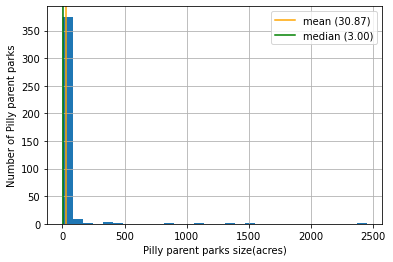

In [12]:
# -- Subset 
pparks_parent = pparks.groupby('PARENT_NAME').sum()
print(pparks_parent)

# -- Reframe 
meanps_p = pparks_parent["ACREAGE"].mean()
medianps_p = pparks_parent["ACREAGE"].median()
print(meanps_p)
print(medianps_p)

# -- Plot the histogram
ax = pparks_parent["ACREAGE"].hist(bins = 30)
ax.axvline(x=meanps_p, c="orange", label="mean (30.87)")
ax.axvline(x=medianps_p, c="green", label="median (3.00)")
ax.set_xlabel("Pilly parent parks size(acres)")
ax.set_ylabel("Number of Pilly parent parks")
ax.legend();

Figure caption (make sure you describe the differences!)

**Figure 3**: Hisogram of the central tendency of the Philly Parent Park sizes. The unit is ACRES. The yellow line indicates the mean of the size, which is around 30.87 acres. The green line indicates the medain of the size, which is around 3 acres. As the graph shown above, the mean is higher than the mean. Therefore, it is plausible to say that the the distribution of the data of the Philly park sizes is right-skewed.

 **NOTE*: Please note some differences between the Figure 1 and the Figure 3. The Figure 3 shows the largest acres is around 2500. Therefore, the mean and the median in the Figure 4 is higher than the one in the Figure 1 as there is a outlier in the dataset.  

What could you measure about this new dataset obtained by grouping the data by PARENT_NAME that would allow you to investigate further the difference in the two dataset? 

Mean of the parent parks smaller than 10 acres is 2.6764371927848094
Median of the parent parks smaller than 10 acres is 1.873372485



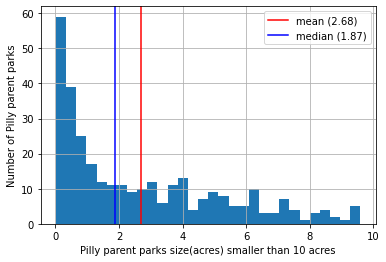

In [13]:
# -- Subset the parks smaller than 10 acres
pparks_p10 = pparks_parent[pparks_parent.ACREAGE < 10]

# -- Calculate mean and median
print("Mean of the parent parks smaller than 10 acres is {0}".format(pparks_p10.ACREAGE.mean()))
print("Median of the parent parks smaller than 10 acres is {0}".format(pparks_p10.ACREAGE.median()))
print("")

# -- Reframe 
meanps_p10 = pparks_p10["ACREAGE"].mean()
medianps_p10 = pparks_p10["ACREAGE"].median()

# -- Plot the histogram
ax = pparks_p10.ACREAGE.hist(bins = 30)
ax.axvline(x=meanps_p10, c="red", label="mean (2.68)")
ax.axvline(x=medianps_p10, c="blue", label="median (1.87)")
ax.set_ylabel("Number of Pilly parent parks")
ax.set_xlabel("Pilly parent parks size(acres) smaller than 10 acres")
ax.legend();

**Figure 4** :  Histogram of the central tendency of the Philly Parent Park sizes smaller than 10 acres. This graph shows the distribution of the Philly park sizes clearly rather than the graph in Figure 3. The red line indicates the mean of the size, which is 2.68 acres. The blue line indicates the medain of the size, which is around 1.87 acres. Similarly, the mean is higher than the mean, and therefore the distribution of the data is right-skewed. The difference between Figure 3 and Figure 4 is that the gap between the mean and the median in the Figure 3 is more apprent the one in Figure 4.  

 **NOTE*: Please note difference between the Figure 2 and the Figure 4. Both figure shows the park sizes smaller than 10 acres, however, the Figure 4 shows the parent park which are classified as the larger parks. Therefore, the mean and the median in the Figure 4 is lower than the one in the Figure 2 as the classification status of the size of the park is larger.
